In [1]:
# Our main aim is to train a model on the basis of
# weight and height

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight (1).csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


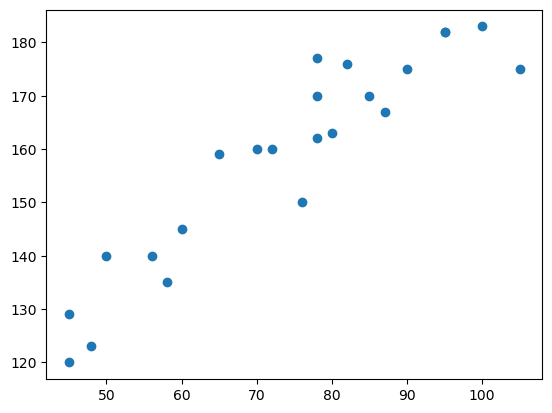

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.show()

In [6]:
## divide out data set into indepent and depenedt features
X=df[['Weight']] ## independet feature

y=df['Height'] ## dependent feature

In [7]:
## train test split impotnat


from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)# size says that 20% will test data in X and reamiang of the
## 80 % will training the data 

In [9]:
X.shape


(23, 1)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [11]:
## standardization of the dataset mainly indepent feature
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


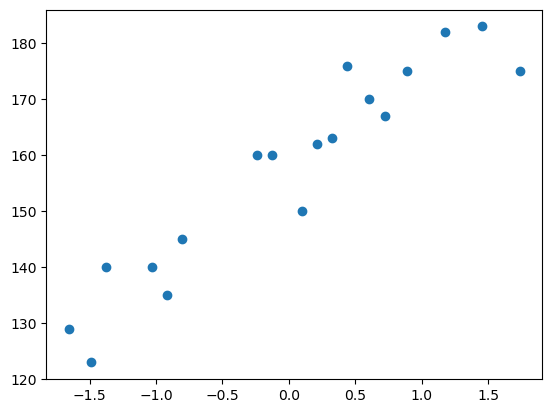

In [15]:
plt.scatter(X_train,y_train)
plt.show()

In [16]:
##train our model using linear regression 
from sklearn.linear_model import LinearRegression

In [17]:
regressor=LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print("the slope or coefficeitn of weight is ",regressor.coef_)
print("the intercept",regressor.intercept_)

the slope or coefficeitn of weight is  [17.03440872]
the intercept 157.5


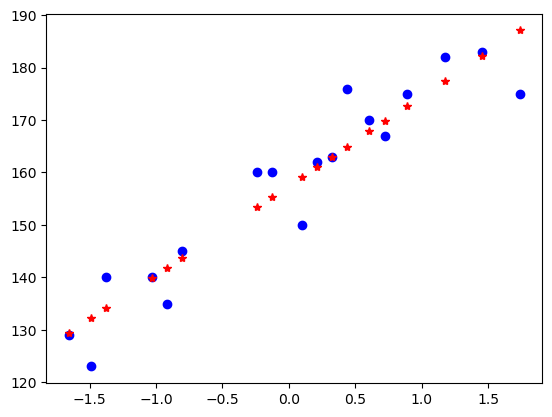

In [20]:
plt.scatter(X_train,y_train,color='b')
plt.plot(X_train,regressor.predict(X_train),'r*')
plt.show()

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [22]:
y_pred_test=regressor.predict(X_test)

In [23]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

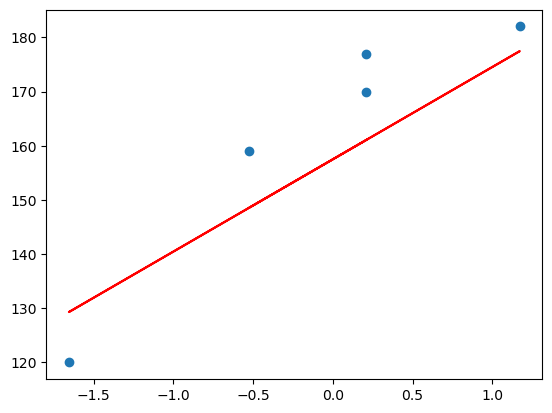

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')
plt.show()

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mse=mean_squared_error(y_test,y_pred_test)
"""MSE tells us how wrong our model’s predictions are — on average.
The smaller the MSE, the smarter our model is. 😎"""
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print(score)


0.776986986042344


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [36]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [38]:
regressor


LinearRegression()

In [49]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\chend\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [53]:
regressor.predict(scaled_weight)


array([163.01076266])

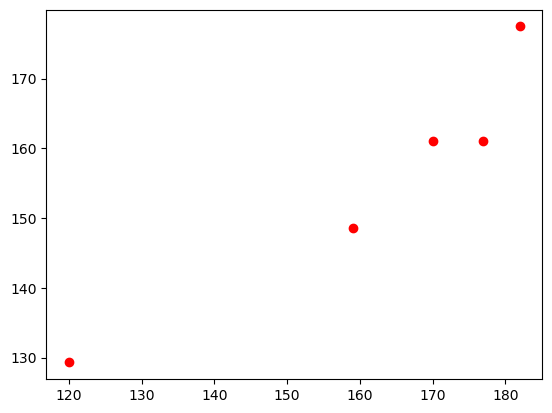

In [63]:
## assumptions 
##plot a  scatteer plot fot the predictions
plt.scatter(y_test,y_pred_test,color='r')
plt.show()

In [81]:
## residuals 
residu=y_test-y_pred_test
residu


15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

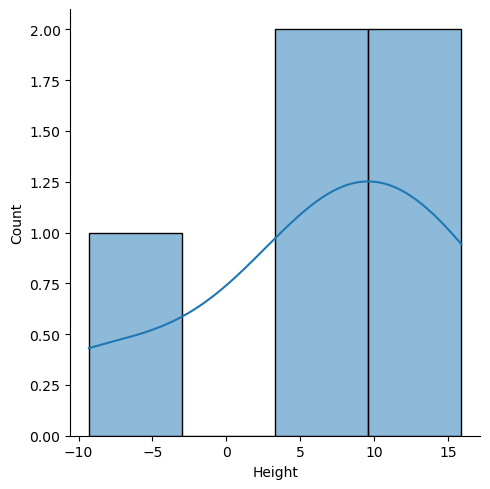

In [83]:
import seaborn as sns
sns.displot(residu,kde=True)
plt.show()